In [1]:
import os
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Import Behavioral Data

In [6]:
previous, current = os.path.split(os.getcwd())
dname = previous[0:-5] 
fname =dname+ "\\data\\all_subjects_sentences.csv"

# Import dataframe with sentences data 
df_sent = pd.read_csv(fname)
df_sent['scores'] = np.around(df_sent['scores'] * 7) / 7.

In [8]:
fname2 = dname +"\\data\\all_subjects_isolated_words.csv"
# Import dataframe with words data 
df_word = pd.read_csv(fname2)

In [9]:
mean_scores_w = df_word.groupby(['vitesse'])['scores'].mean().values
sem_w = df_word.groupby(['vitesse'])['scores'].sem().values
compress_w = np.sort(np.asarray(list(set(df_word['real_speed'].values))))
all_in_w = df_word.groupby(['vitesse'])['scores']
ind_word = df_word.groupby(['suj_id','vitesse'])['scores'].mean().values
ind_word = ind_word.reshape(21,10)

In [10]:
mean_scores_s = df_sent.groupby(['vitesse'])['scores'].mean().values
sem_s = df_sent.groupby(['vitesse'])['scores'].sem().values
compress_s = np.sort(np.asarray(list(set(df_sent['vitesse'].values))))
all_in_s = df_sent.groupby(['vitesse'])['scores']
ind_sent = df_sent.groupby(['suj_id','vitesse'])['scores'].mean().values
ind_sent = ind_sent.reshape(21,7)

# Plot Behavioral Data

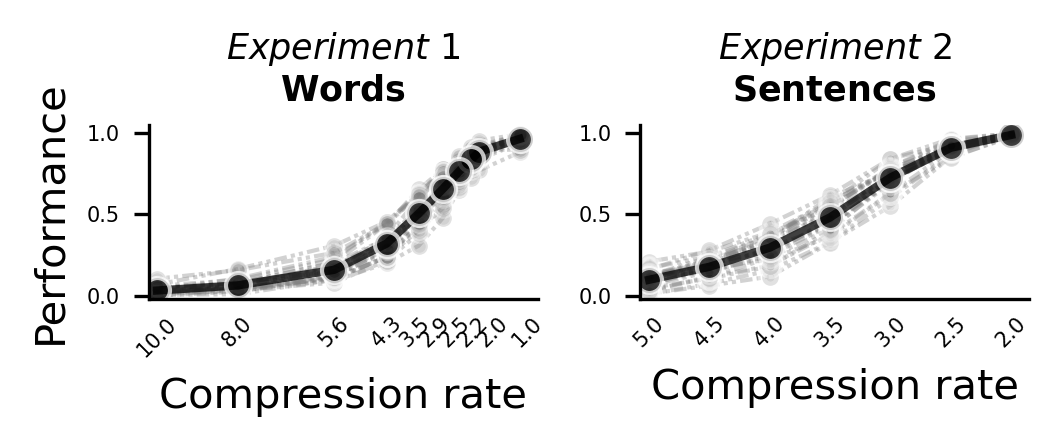

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7.09/2, 1.5), facecolor='w', dpi=300)
plt.rcParams["font.size"] = "7"

for i in ind_word:
     #ax1.semilogx
     ax1.plot(-compress_w, i,marker='o',markersize=4,linewidth=1,linestyle=(0, (3, 1, 1, 1, 1, 1)),markeredgecolor='w',alpha = 0.35, color='grey')
ax1.plot(-compress_w, mean_scores_w, marker='o',markersize=6,color='k', linewidth=2,markeredgecolor='w',alpha = 0.75)

ax1.tick_params(which='both', size=0, axis='x')
ax1.set_xticks([ -0.8 ,  -1.65 ,  -2.15,  -2.6,  -3.1,  -3.6,  -4.3,  -5.6,  -8. , -10. ])
ax1.set_xticklabels(compress_w, rotation=45, va ='top')#
ax1.set_ylabel('Performance')
ax1.set_xlim(-10.2)
ax1.set_title(r'$\it{Experiment\ 1}$' + "\n" + r'$\bf{Words}$')

for j in ind_sent:
    ax2.plot(-compress_s, j,marker='o',markersize=4,linewidth=1,linestyle=(0, (3, 1, 1, 1, 1, 1)),markeredgewidth=2,markeredgecolor='w',alpha = 0.35, color='grey')
ax2.plot(-compress_s, mean_scores_s, marker='o',markersize=6,color='k', linewidth=2,markeredgecolor='w',alpha = 0.75)
ax2.set_xticks(-compress_s)
ax2.set_xticklabels(compress_s, rotation=45, va ='top')
ax2.tick_params(which='both', size=0, axis='x')
ax2.set_xlim(-5.072)
ax2.set_title(r'$\it{Experiment\ 2}$' + "\n" + r'$\bf{Sentences}$')

for ax in [ax1,ax2]:
    ax.set_ylim(-0.02)
    ax.set_xlabel('Compression rate')
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=5, which='both')
    ax.spines['top'].set_visible(False);
plt.tight_layout();

In [10]:
#fig.savefig(dname+"\\figures\\Figure_2.png", dpi=300, bbox_inches='tight')